# CSE 482: Big Data Analysis (Spring 2020) Homework 4 Part 2

Due date: Sunday, April 5, 2020 (before midnight US Eastern Time)

Submit your homework using the D2L system. Use the notebook below to write the solution of your homework. Make sure you submit the notebook along with its HTML version.

**1.** For this question, you need to write the code for a variation of k-means clustering algorithm known as bisecting k-means. The algorithm works as follows. Suppose you want to create 4 clusters. The algorithm will first apply standard k-means algorithm to bisect the entire data into 2 clusters, say, C1 and C2. It then computes the sum-of-squared error (SSE) of each cluster and choose the cluster with higher SSE to be further partitioned into 2 smaller clusters. For example, if cluster C1 has larger SSE than C2, the algorithm will apply standard k-means to all the data points in cluster C1 and divide the cluster into 2 smaller clusters, say, C1a and C1b. At this time, you have 3 clusters: C1a, C1b, and C2. Next, you will compare the SSE of the 3 clusters and choose the one with highest SSE. You will bisect the cluster with highest SSE into 2 smaller clusters, thereby creating the 4 clusters needed. You may review the example given in the attached slides, bisecting.pptx or bisecting.pdf.

**(a)** Download the 2-dimensional dataset *2d_data.csv* from D2L and load it into a pandas DataFrame object named *data*. Assign the names of its two columns as 'x1' and 'x2', respectively. Display the first 5 rows of the dataframe and draw a 2-dimensional scatter plot of the data points. 

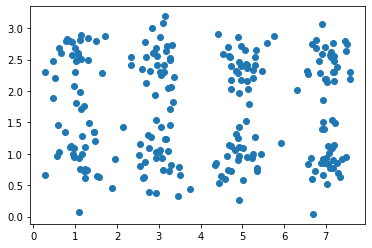

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
name=['x1','x2']
#matplotlib inline
data = pd.read_csv('2d_data2.csv',encoding='utf-8',header=None,names=[name[i] for i in range(2)])
data.head(5)
plt.scatter(data.iloc[:,0],data.iloc[:,1])

**(b)** Write the function bisect() that takes three input arguments: data to be clustered, k (number of clusters), and seed (for random number generator). The function should return the cluster labels as output. To ensure your code is correct, you should maintain a list of sum-square-error (SSE) of the clusters and display the SSE list at each iteration. As the cluster is bisected into 2 smaller clusters, the number of elements in the SSE list should increase by 1. The process continues until there are k elements in the SSE list.     

In [4]:
from sklearn.cluster import KMeans 
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

#Calculate list to add elements multiple times
def fun1(list1,v,n):
    i=0
    while i<n:
        list1.append(v)
        i=i+1
    return list1
#Dictionary sorting to get tags
def fun2(list2):
    values = []
    y = []
    for i in range(len(list2)):
        values=fun1(values,i,len(list2[i]))
    keys=[n for a in list2 for n in a ]
    dic=dict(zip(keys,values))
    for i in sorted (dic) :
            y.append(dic[i])
    return y

def bisect(data, k, seed = 1):
    init_coor=[np.mean(data.iloc[:,0]),np.mean(data.iloc[:,1])]
    SSE=[]
    sum=0
    for i in range(data.shape[0]):
        ds=(data.iloc[i,0]-init_coor[0])**2+(data.iloc[i,1]-init_coor[1])**2
        sum=sum+ds
    SSE.append(sum)
    print('Iteration 0  SSE =', SSE)
    datall=data
    datall_list=[]
    datall_list.append([i for i in range(0,240)])
    max_S_index=0
    for numClusters in range(1,k):
        SSE.pop(max_S_index)
        datall_list.pop(max_S_index)
        clusters = KMeans(2, max_iter=1,random_state=seed)
        clusters.fit_predict(np.array(datall))
        lable_pred=clusters.labels_
        centroids=clusters.cluster_centers_
        SSE1=0
        SSE2=0
        dataA=pd.DataFrame(columns=['x1','x2'])
        dataB=pd.DataFrame(columns=['x1','x2'])
        for j in range(len(lable_pred)):
            if lable_pred[j]==False:
                d=(datall.iloc[j,0]-centroids[0][0])**2+(datall.iloc[j,1]-centroids[0][1])**2
                SSE1=SSE1+d
                dataA=dataA.append(datall.iloc[j])
            elif lable_pred[j]==True:
                e=(datall.iloc[j,0]-centroids[1][0])**2+(datall.iloc[j,1]-centroids[1][1])**2
                SSE2=SSE2+e
                dataB=dataB.append(datall.iloc[j])
        dataA_list= dataA.index.tolist() 
        dataB_list= dataB.index.tolist() 
        #print(dataB_list)
        #print(dataA_list)
        SSE.append(SSE1)
        SSE.append(SSE2)
        datall_list.append(dataA_list)
        datall_list.append(dataB_list)
        max_S_index=SSE.index(max(SSE))
        data_tmp=pd.DataFrame(columns=['x1','x2'])
        data_tmp=data_tmp.append(data.iloc[[i for i in datall_list[max_S_index]]])
        datall=data_tmp
        print('Iteration', numClusters, ' SSE =', SSE)
    labels = fun2(datall_list)
    data['labels'] = labels
    return labels

**(c)** Apply the bisecting k-means algorithm to generate 8 clusters from the data. Assign the clustering result as another column, named 'labels' of the dataframe. Draw a scatter plot of the data using the cluster labels as color of the data points in the scatter plot.

Iteration 0  SSE = [1365.6945979485834]
Iteration 1  SSE = [206.10668865383343, 215.70502668666666]
Iteration 2  SSE = [206.10668865383343, 43.43106116466667, 44.50749403133333]
Iteration 3  SSE = [43.43106116466667, 44.50749403133333, 47.96253796372882, 47.72318725278689]
Iteration 4  SSE = [43.43106116466667, 44.50749403133333, 47.72318725278689, 7.436857757666665, 6.254233716551726]
Iteration 5  SSE = [43.43106116466667, 44.50749403133333, 7.436857757666665, 6.254233716551726, 7.481366151612905, 5.297583828333333]
Iteration 6  SSE = [43.43106116466667, 7.436857757666665, 6.254233716551726, 7.481366151612905, 5.297583828333333, 4.395181067, 4.958932097666666]
Iteration 7  SSE = [7.436857757666665, 6.254233716551726, 7.481366151612905, 5.297583828333333, 4.395181067, 4.958932097666666, 5.751973757241379, 5.042813212903225]


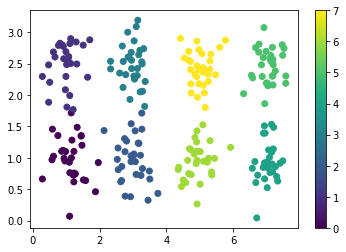

In [178]:
data['labels'] = bisect(data, 8, 1)
plt.scatter(data['x1'],data['x2'],c=data['labels'])
plt.colorbar()
plt.show()

**5.** For this question, you will apply the distance-based anomaly detection algorithm to detect anomalies in a given dataset.  

**(a)** Download the lymphography dataset (lympho.csv) from the D2L page. The original data was obtained from http://odds.cs.stonybrook.edu/lympho/.

**(b)** Use pandas to load the file lympho.csv into a DataFrame object named *data*. Display the first 10 rows of the data frame. 

In [182]:
import pandas as pd

data = pd.read_csv('lympho.csv', header=None)
print(data[:10]) 


    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0  1.0  2.0  1.0   
2  3.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  1.0  1.0  2.0  2.0  8.0  1.0   
3  3.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0  3.0  1.0  1.0  4.0  2.0  5.0  3.0   
4  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  4.0  2.0  4.0  3.0   
5  3.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0  3.0  1.0  1.0  2.0  1.0  5.0  3.0   
6  3.0  2.0  1.0  1.0  2.0  2.0  1.0  2.0  1.0  3.0  3.0  2.0  3.0  4.0  2.0   
7  3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  4.0  3.0  5.0  1.0   
8  2.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  3.0  3.0  3.0  3.0  6.0  3.0   
9  2.0  2.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  3.0  2.0  3.0  8.0  2.0   

    15   16   17  18  
0  1.0  1.0  1.0   1  
1  1.0  1.0  2.0   1  
2  2.0  2.0  4.0   1  
3  1.0  2.0  4.0   1  
4  2

**(c)** Note that the last column in each row corresponds to the actual class (1: anomaly and 0: normal). Extract the last column into a pandas series object named *label* and count the number of normal and anomaly data points in the data. After extracting the label, drop the last column from *data*. DIsplay the size of the remaining dataframe.

In [183]:
...

print('Size of data =', data.shape)
row, col = data.shape
label = data.loc[:,col-1]

print('Class distribution:')
print('0 ', len(label[label == 0]))
print('1 ', len(label[label == 1]))
print('Name: ', label.name, ', dtype: ' ,label.dtype)


Size of data = (148, 19)
Class distribution:
0  142
1  6
Name:  18 , dtype:  int64


**(d)** Apply the nearest-neighbor approach to detect outliers in the data. Specifically, for each data point, find its top-10 nearest neighbors (excluding the data point itself). Use the distance to the 10-th nearest neighbor as outlier score. Store the outlier score and predicted class of each data point in a dataframe object named *result*, with two columns named 'k-distance' and 'predicted', respectively. Display the result dataframe.

In [184]:

# # Get the first n-1 column of data, which is the training sample train and the return type is dataframe
train = data.loc[ : , 0 : col - 2]
# # The value of K in k-nearest neighbor algorithm
k = 10
# # n_neighbors indicates the number of neighbors to be searched. The default value of algorithm is auto, and P is the parameter in Minkowski (P = 2 takes Euclidean distance)
neighbor = NearestNeighbors(n_neighbors=k, algorithm='auto', p=2)
# # neighbor.fit (x) takes x as the basic sample point to calculate the neighbor
neighbor.fit(train, label)
# # kneighbors([X,n_neighbors,return_distance]) Find K neighbors in each X
# # By default, the row number array array of K adjacent points is returned
# # return_distance=True, Returns the distance between fit (x) and the nearest K adjacent points of each point of the current x
distanceArray, indexArray = neighbor.kneighbors(X=train, n_neighbors=k, return_distance=True)
# # Distance of the k-th adjacent point
distance = distanceArray[:, k-1]
# # argsort(-array) Sort array from large to small, and return the sorted index
indexSort = np.argsort(-distance)
# # Number of exception Tags
n = 5 
# # Take the n-th distance as the threshold.
threshold = distance[indexSort[n - 1]]
# # Take the first n large distance sample points as the outliers
# # (if the threshold value is greater than or equal to, the outliers will be labeled as 1)
# # (if the threshold value is less than, the regular values will be labeled as 0)
predict = []
for i in range(len(distance)):
    if distance[i] >= threshold:
        predict.append(1)
    else:
        predict.append(0)
result = pd.DataFrame({'predict': predict, 'distance': distance})
print(result)


     predict  distance
0          0  4.123106
1          0  3.605551
2          1  4.582576
3          1  4.358899
4          0  3.872983
..       ...       ...
143        0  3.605551
144        0  3.316625
145        0  2.645751
146        0  2.828427
147        0  2.449490

[148 rows x 2 columns]


**(e)** Show the confusion matrix by comparing the true class of the data points against the predicted class obtained in step (d). Display the accuracy of the method as well.

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy_score: ', accuracy_score(label, predict))
print('confusion_matrix: ')
print(confusion_matrix(label, predict))


accuracy_score:  0.9662162162162162
confusion_matrix: 
[[140   2]
 [  3   3]]
